#  Challenge : Exploratory Data Analysis w/ Pandas and Matplotlib


Let's switch gear and work with a real data set from homes being sold in the Seattle area.

Let's start by reading and exploring the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [2]:
data = pd.read_csv('data/SeattleHomePrices.csv')

## Problem 1
Let's use a subset of the data set that only contains the following columns: PROPERTY TYPE, ZIP, PRICE, BEDS, BATHS, SQUARE FEET, DAYS ON MARKET. Save it in a Pandas Dataframe named small_data.

In [3]:
small_data = data[['PROPERTY TYPE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'DAYS ON MARKET']]

## Problem 2

    *Show a sample of 5 houses
    *Get a summary of the numerical values

In [4]:
small_data.sample(5)

,PROPERTY TYPE,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,DAYS ON MARKET
207,Condo/Co-op,98144,395000,2,1.00,858.0,12
265,Vacant Land,98144,690000,0,NaN,NaN,26
143,Single Family Residential,98112,2350000,5,3.00,4700.0,7
153,Townhouse,98108,628000,3,2.25,1520.0,7
24,Condo/Co-op,98133,295000,1,1.00,707.0,1


In [5]:
small_data.describe()

,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,DAYS ON MARKET
count,350.000000,3.500000e+02,350.000000,324.000000,327.000000,350.000000
mean,98125.342857,9.730178e+05,2.888571,2.219907,2039.064220,19.880000
std,25.070723,9.797377e+05,1.842397,1.208547,1572.550774,23.239069
min,98101.000000,7.500000e+04,0.000000,0.750000,240.000000,1.000000
25%,98107.000000,5.121750e+05,2.000000,1.500000,1090.000000,5.000000
50%,98118.000000,7.294440e+05,3.000000,2.000000,1640.000000,8.000000
75%,98126.000000,1.095000e+06,4.000000,2.750000,2565.000000,26.000000
max,98199.000000,1.000000e+07,11.000000,11.000000,17011.000000,114.000000


## Problem 3
Our data set contains 350 houses.  However, there are some NULL values in SQUARE FEET and BATHS.  Let's drop the houses with at least 1 NULL value in any of the columns of the dataset.

**Hint:** Pandas dropna

In [6]:
small_data.dropna(inplace = True)

/Users/cliffclive/miniconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Problem 4
Create a histograms that shows the distribution of the number of BEDS

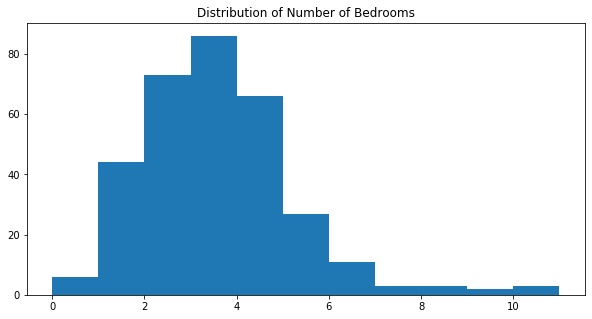

In [7]:
plt.figure(figsize=[10,5])

# plt.hist(small_data['BEDS'])
plt.hist(small_data['BEDS'],small_data['BEDS'].max())
plt.title('Distribution of Number of Bedrooms');

## Problem 5

Create a pie chart that shows the percenatge of houses with more than 2 bathrooms, compared to 2 or less bathrooms.

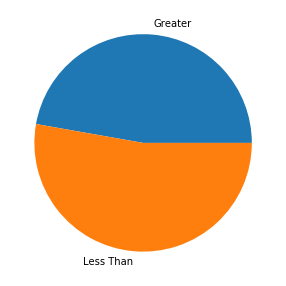

In [8]:
greater = len(small_data[small_data['BATHS']>2])
lessthan = len(small_data[small_data['BATHS']<=2])

plt.figure(figsize=[5,5])
plt.pie([greater,lessthan],labels=['Greater','Less Than']);

## Problem 6

Create two scatter plots that shows the PRICE in the $y$ axis and the SQUARE FEET in the $x$-axis.

1) One scatter plot should be in a normal scale.

2) The other scatter plot should have a log-log scale.

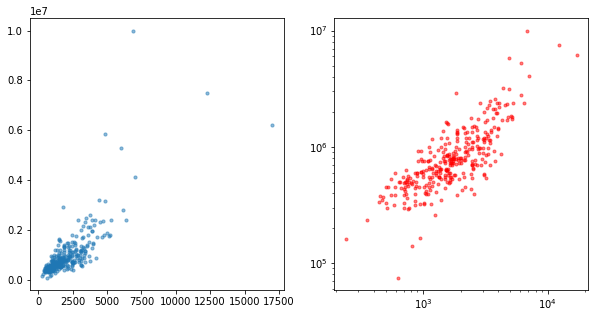

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(small_data['SQUARE FEET'],small_data['PRICE'],alpha = 0.5,s=10);

plt.subplot(1,2,2)
plt.loglog(small_data['SQUARE FEET'],small_data['PRICE'],'r.',alpha = 0.5);

## Problem 7 (Challenge)

Create a bar chart that shows the different PROPERTY TYPEs in the $x$-axis, and the average days on the market on the $y$-axis.

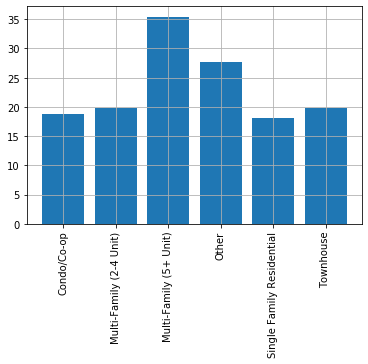

In [10]:
PropType = small_data.groupby(['PROPERTY TYPE'])['DAYS ON MARKET'].mean()
plt.bar(range(len(PropType)),PropType.values)
plt.xticks(range(len(PropType)),PropType.index,rotation = 90)
plt.grid();